In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_numeric_dtype
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
sns.set_style("darkgrid")
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn import  metrics
%matplotlib inline


import warnings

warnings.filterwarnings('ignore')

sns.set()

%matplotlib inline

2.LOADING DATASET

In [3]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/abalone.csv')
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


 3.I)Univariate Analysis

In [ ]:
#univariate analysis

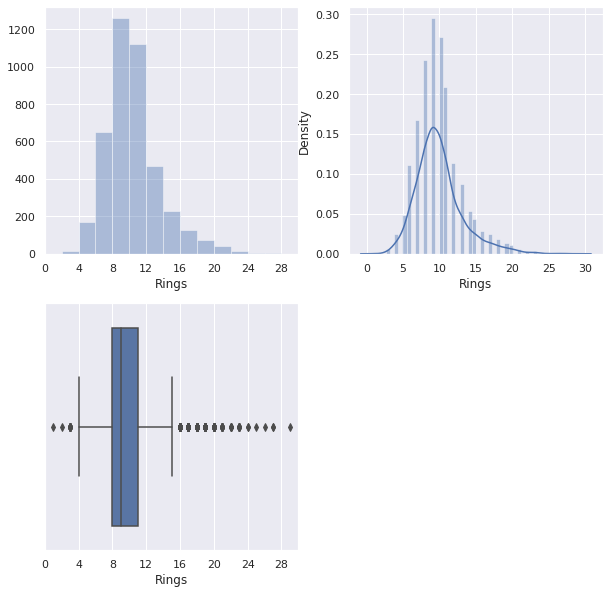

In [4]:
rows = 2
cols = 2
i = 0

plt.figure(figsize=(cols * 5, rows * 5))

i += 1
plt.subplot(rows, cols, i)
plt.xticks(range(0, 31, 4))
plt.xlim(0, 30)
_ = sns.distplot(data['Rings'], kde=False, bins=range(0, 31, 2))

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(data['Rings'])
i += 1
plt.subplot(rows, cols, i)
plt.xticks(range(0, 31, 4))
plt.xlim(0, 30)
_ = sns.boxplot(data['Rings'])

In [ ]:
!pip install -U seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 288 kB 5.2 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


ValueError: ignored

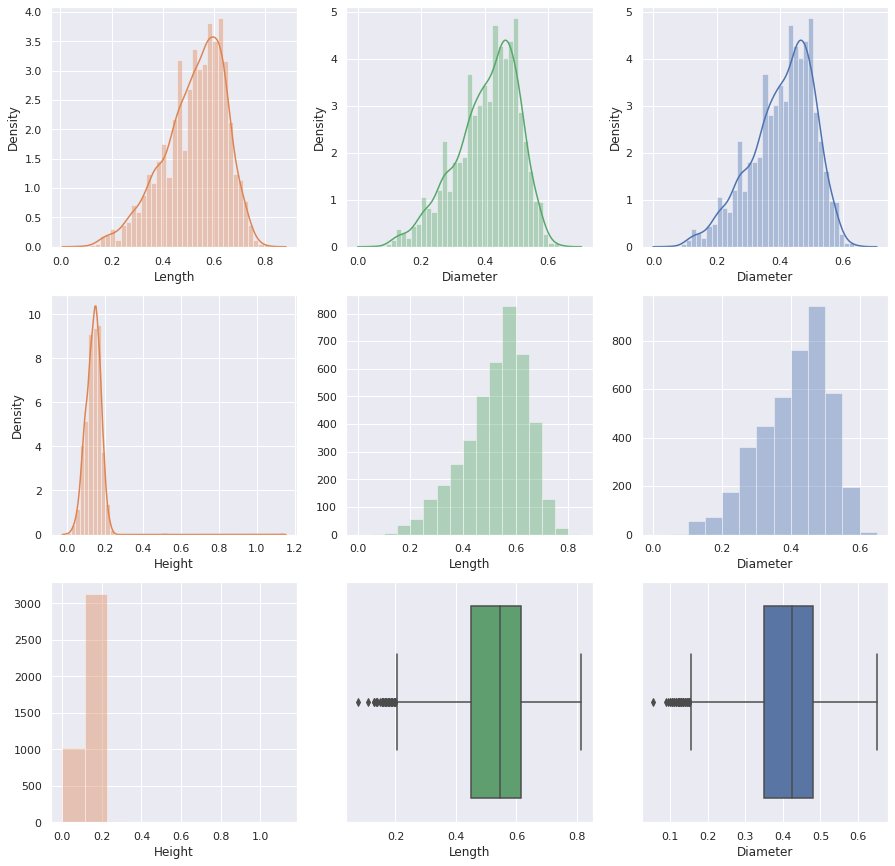

In [ ]:
#size attribute
plt.figure(figsize=(15, 15))

colors = sns.color_palette()

lines = 3
rows = 3
i = 0

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(data['Length'], color=colors[i % 3])
    
i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(data['Diameter'], color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(data['Diameter'], color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(data['Height'], color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(data['Length'], kde=False, bins=np.arange(0.0, 0.9, 0.05), color=colors[i % 3])
    
i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(data['Diameter'], kde=False, bins=np.arange(0.0, 0.7, 0.05), color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.distplot(data['Height'], kde=False, bins=10, color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.boxplot(data['Length'], color=sns.color_palette()[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.boxplot(data['Diameter'], color=colors[i % 3])

i += 1
plt.subplot(lines, rows, i)
_ = sns.boxplot(data['Height'], color=colors[i % 3])

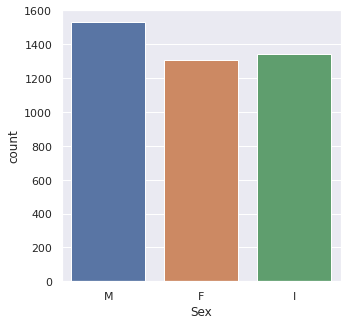

In [ ]:
#sex attribute
plt.figure(figsize=(5,5))
_ = sns.countplot(data.Sex)

3.III) MULTIVARIATE ANALYSIS

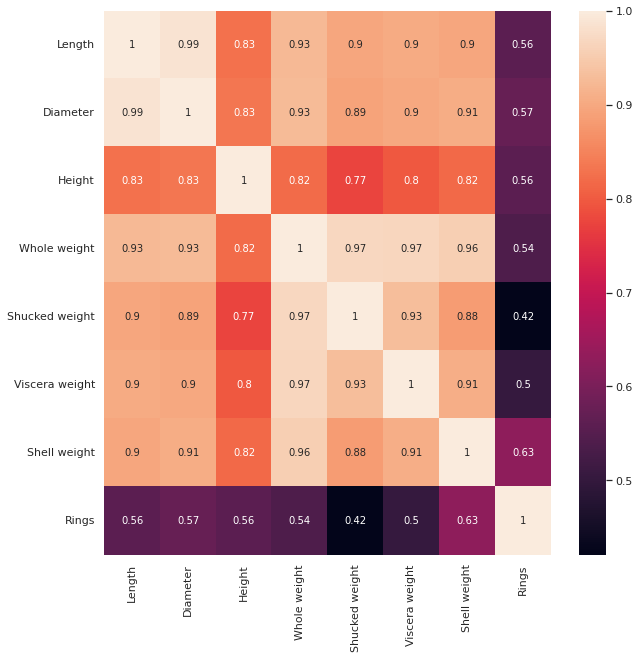

In [ ]:
#multivariate analysis
plt.figure(figsize=(10, 10))
corr = data.corr()
_ = sns.heatmap(corr, annot=True)

<Figure size 1440x360 with 0 Axes>

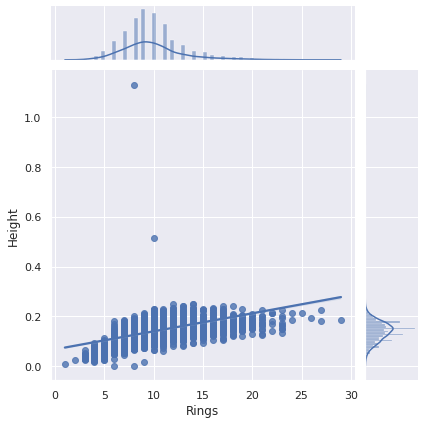

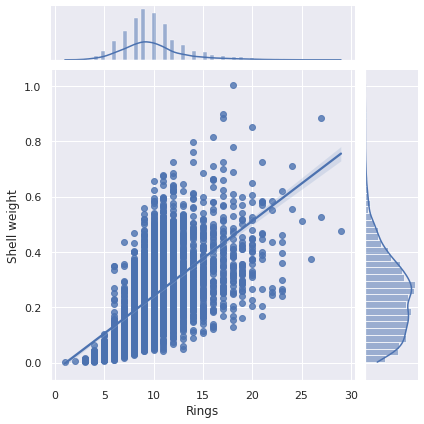

In [ ]:
#correlation of height and weight on rings
plt.figure(figsize=(20, 5))

_ = sns.jointplot(data=data, x='Rings', y='Height', kind='reg')
_ = sns.jointplot(data=data, x='Rings', y='Shell weight', kind='reg')

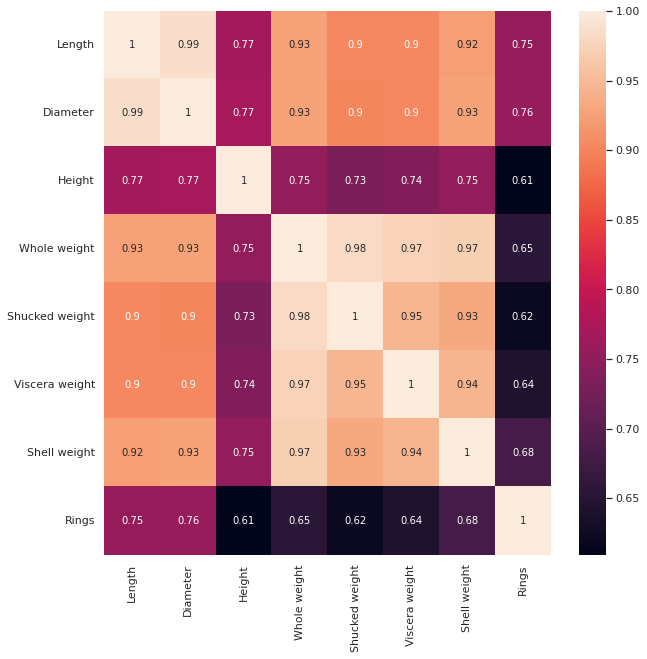

In [ ]:
#variation of the correlation regarding the number of rings
i_abalone = data[data['Rings'] < 10]

plt.figure(figsize=(10, 10))
corr = i_abalone.corr()
_ = sns.heatmap(corr, annot=True)

<Figure size 1440x360 with 0 Axes>

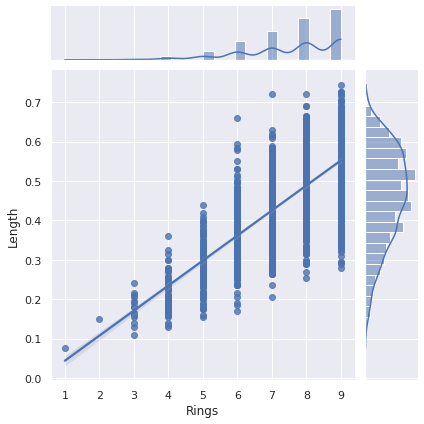

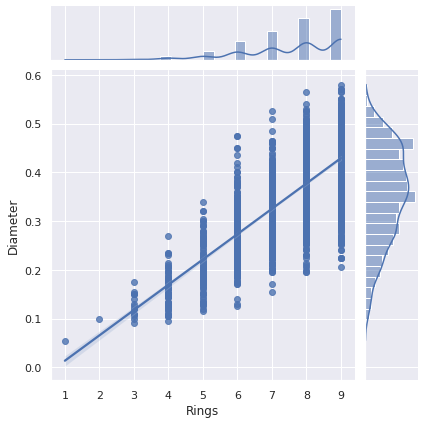

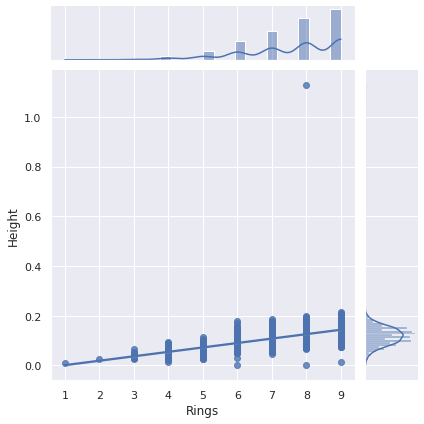

In [ ]:
plt.figure(figsize=(20, 5))

_ = sns.jointplot(data=i_abalone, x='Rings', y='Length',  kind='reg')
_ = sns.jointplot(data=i_abalone, x='Rings', y='Diameter', kind='reg')
_ = sns.jointplot(data=i_abalone, x='Rings', y='Height', kind='reg')

3.II)BIVARIATE 

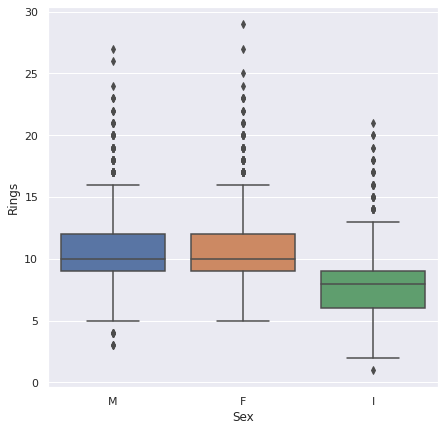

In [ ]:
#sex categories influencing number of rings
plt.figure(figsize=(7, 7))
_ = sns.boxplot(data=data, x='Sex', y='Rings')

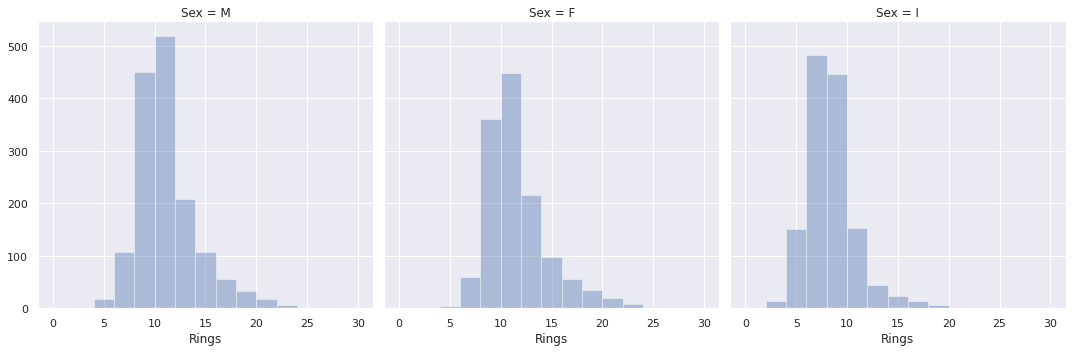

In [ ]:
g = sns.FacetGrid(data, col='Sex', margin_titles=True, size=5)
_ = g.map(sns.distplot, 'Rings', kde=False, bins=range(0, 31, 2))

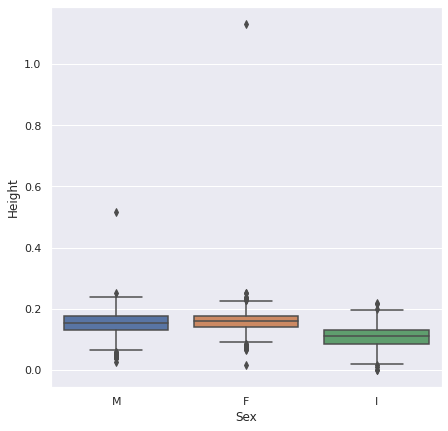

In [ ]:
#Height
plt.figure(figsize=(7, 7))
_ = sns.boxplot(data=data, x='Sex', y='Height')

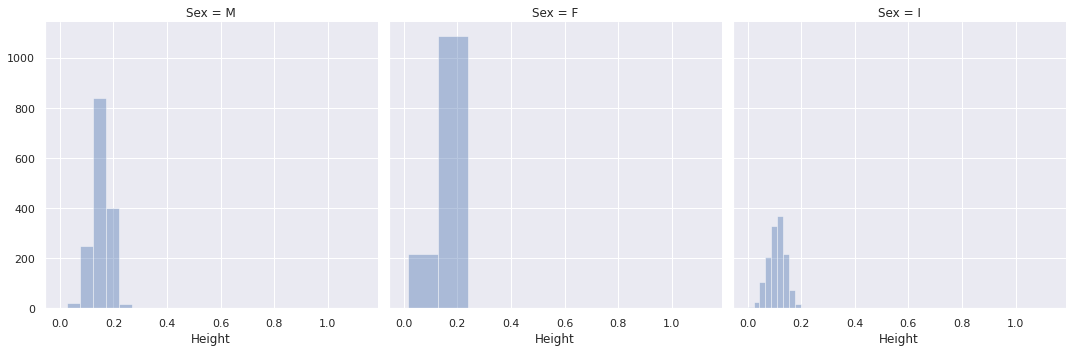

In [ ]:
g = sns.FacetGrid(data, col='Sex', margin_titles=True, size=5)
_ = g.map(sns.distplot, 'Height', kde=False, bins=10)

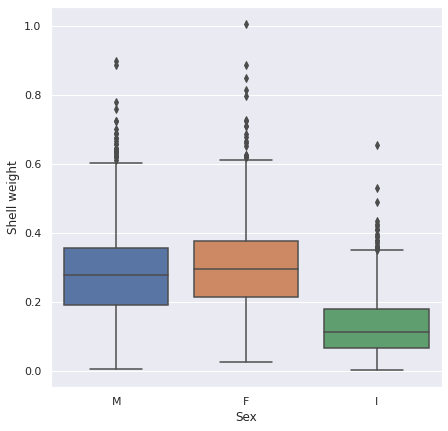

In [ ]:
plt.figure(figsize=(7, 7))
_ = sns.boxplot(data=data, x='Sex', y='Shell weight')

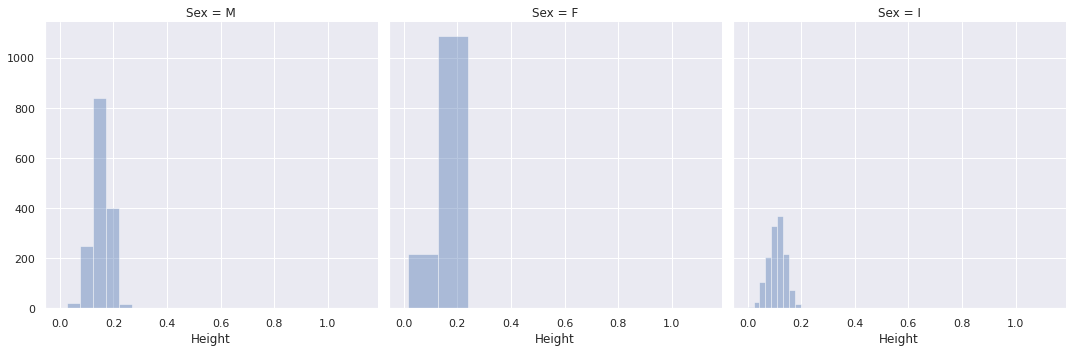

In [ ]:
g = sns.FacetGrid(data, col='Sex', margin_titles=True, size=5)
_ = g.map(sns.distplot, 'Height', kde=False, bins=10)

<Figure size 1440x360 with 0 Axes>

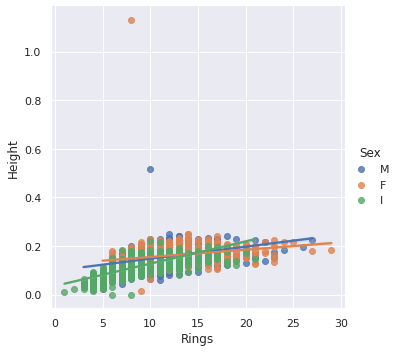

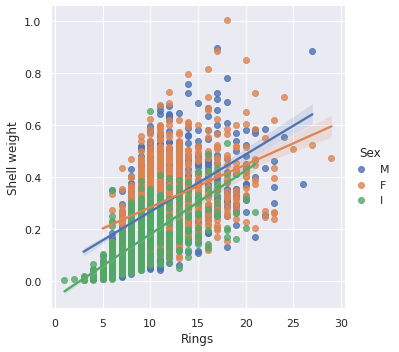

In [ ]:
plt.figure(figsize=(20, 5))

_ = sns.lmplot(data=data, x='Rings', y='Height', hue='Sex', fit_reg=True)
_ = sns.lmplot(data=data, x='Rings', y='Shell weight', hue='Sex', fit_reg=True)

Text(0.5, 0, 'Rings')

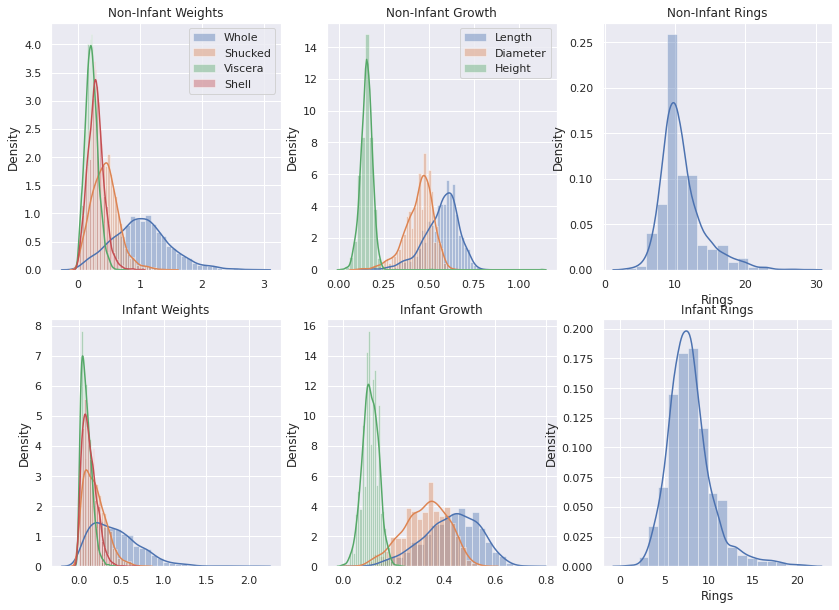

In [ ]:
#Exploring the data
inf_df = data[data['Sex']=='I']
ni_df  = data[data['Sex']!='I']
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)

ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)

# Non infant weight info
sns.distplot(ni_df['Whole weight'],   label='Whole',   ax=ax1)
sns.distplot(ni_df['Shucked weight'], label='Shucked', ax=ax1)
sns.distplot(ni_df['Viscera weight'], label='Viscera', ax=ax1)
sns.distplot(ni_df['Shell weight'],   label='Shell',   ax=ax1)
ax1.legend()
ax1.set_title('Non-Infant Weights')


# Infant weight info
sns.distplot(inf_df['Whole weight'],   label='Whole',   ax=ax4)
sns.distplot(inf_df['Shucked weight'], label='Shucked', ax=ax4)
sns.distplot(inf_df['Viscera weight'], label='Viscera', ax=ax4)
sns.distplot(inf_df['Shell weight'],   label='Shell',   ax=ax4)
ax4.set_title('Infant Weights')


# Non-infant growth
sns.distplot(ni_df['Length'],   label='Length',   ax=ax2)
sns.distplot(ni_df['Diameter'], label='Diameter', ax=ax2)
sns.distplot(ni_df['Height'],   label='Height',   ax=ax2)
ax2.set_title('Non-Infant Growth')
ax2.legend()


# Infant growth
sns.distplot(inf_df['Length'],   label='Length',   ax=ax5)
sns.distplot(inf_df['Diameter'], label='Diameter', ax=ax5)
sns.distplot(inf_df['Height'],   label='Height',   ax=ax5)
ax5.set_title('Infant Growth')


# Plot system response
sns.distplot(ni_df['Rings'], bins=18, ax=ax3)
ax3.set_title('Non-Infant Rings')

sns.distplot(inf_df['Rings'], bins=18, ax=ax6)
ax6.set_title('Infant Rings')


ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('Rings')
ax4.set_xlabel('')
ax5.set_xlabel('')
ax6.set_xlabel('Rings')

4.descriptive statistics
Weight distributions:

Whole weight has large variance compared to other weight factors, since it is integrating multiple weights.
Whole weight is therefore unlikely to correlate as strongly as other weight variables.
Shell weight and viscera weight appear to be the two quantities that best reflect the size of the organism.
Length, height, and diameter distribution:

The length and diameter are both slightly negatively skewed. A skewed distribution indicates a natural upper limit on the quantity, which would be expected for quantities related to size.
Infant and non-infant heights have very similar distributions
Infant weights and lengths have smoother distributions with lower means and higher variances than the adult weight and length distributions.
Infant vs. adult:

Infants have measurements with smaller means and higher variance than adults.
A model that makes predictions about the number of rings in infant shells will therefore have greater uncertainty and need to be more robust.
A good starting point is to build a model that does not include infants, reducing variability in the population.

In [ ]:
5.#To handle missing data
#To find missing data notnull can be used and to handle fillna is used
data.notnull()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
4172,True,True,True,True,True,True,True,True,True
4173,True,True,True,True,True,True,True,True,True
4174,True,True,True,True,True,True,True,True,True
4175,True,True,True,True,True,True,True,True,True


In [5]:
data.fillna(0)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


6.OUTLIERS IN EACH ATTRIBUTES

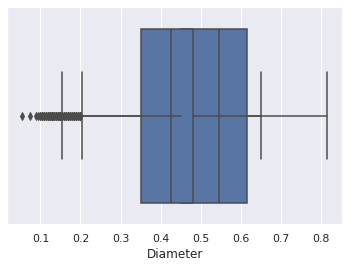

In [6]:
sns.boxplot(data['Length'],data=data)


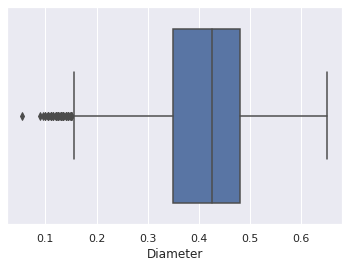

In [8]:
sns.boxplot(data['Diameter'],data=data)

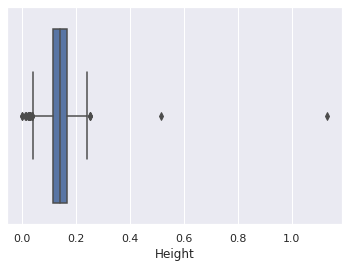

In [9]:
sns.boxplot(data['Height'],data=data)

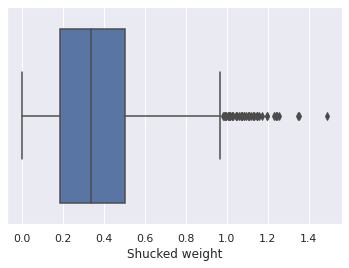

In [11]:
sns.boxplot(data['Shucked weight'],data=data)

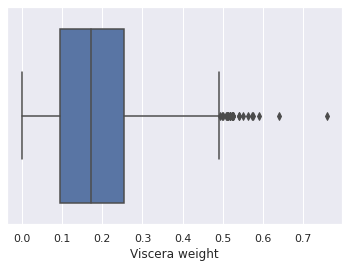

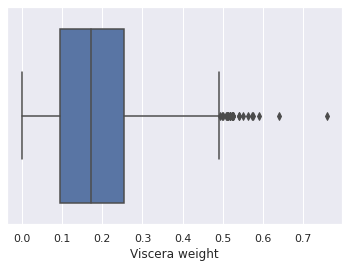

In [13]:
sns.boxplot(data['Viscera weight'],data=data)

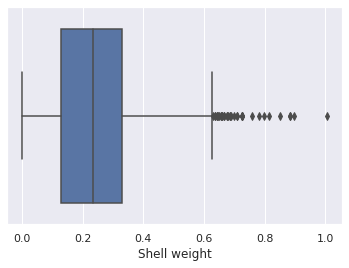

In [14]:
sns.boxplot(data['Shell weight'],data=data)

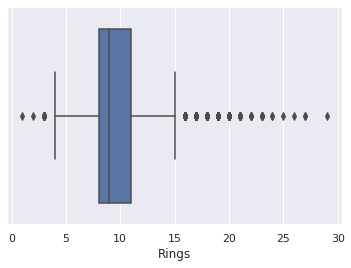

In [16]:
sns.boxplot(data['Rings'],data=data)

In [18]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Length            0.1650
Diameter          0.1300
Height            0.0500
Whole weight      0.7115
Shucked weight    0.3160
Viscera weight    0.1595
Shell weight      0.1990
Rings             3.0000
dtype: float64


7.Removing outliers

In [19]:
abalone = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
abalone.shape

(3781, 9)

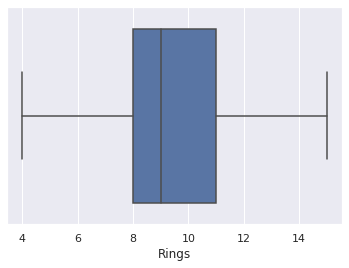

In [20]:
sns.boxplot(abalone['Rings'],data=abalone)

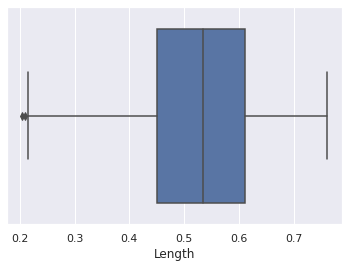

In [21]:
sns.boxplot(abalone['Length'],data=abalone)

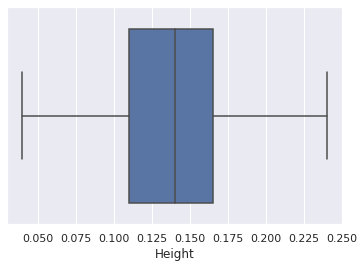

In [22]:
sns.boxplot(abalone['Height'],data=abalone)


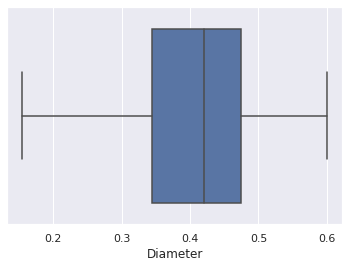

In [23]:
sns.boxplot(abalone['Diameter'],data=abalone)

After removing the outliers, the above dataset has received.

8.LABEL ENCODING OF CATEGORICAL DATA

In [24]:
data["M"] = np.nan
data["F"] = np.nan
data["I"] = np.nan
columnName='Sex'
for i in range (len(data[columnName])):
    if data[columnName][i]=='M':
      data['M'][i]=1
      data['F'][i]=0
      data['I'][i]=0
    elif data[columnName][i]=='F':
      data['M'][i]=0
      data['F'][i]=1
      data['I'][i]=0
    elif data[columnName][i]=='I' :
      data['M'][i]=0
      data['F'][i]=0
      data['I'][i]=1
df=data.drop(['Sex'],axis=1)

In [27]:
le=LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])

In [28]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,M,F,I
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1.0,0.0,0.0
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1.0,0.0,0.0
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0.0,1.0,0.0
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1.0,0.0,0.0
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0.0,0.0,1.0


Above we have encoded the categorical data "Sex" as 0 or 1 or 2 based on M or F or I

8.Spliting the Data into dependent and Independent Variables

In [50]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

9.Scaling Independent variables

In [36]:
scaler = StandardScaler()
scaler.fit(data)

StandardScaler()

10.Spliting training and test data

In [51]:
train_X,val_X,train_y,val_y = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [52]:
print("Shape of Training X :",train_X.shape)
print("Shape of Validation X :",val_X.shape)

Shape of Training X : (3341, 11)
Shape of Validation X : (836, 11)


In [53]:
print("Shape of Training y :",train_y.shape)
print("Shape of Validation y :",val_y.shape)

Shape of Training y : (3341,)
Shape of Validation y : (836,)


11.12,13.LINEAR REGRESSION

In [55]:
lr = LinearRegression()
lr.fit(train_X,train_y)


LinearRegression()

In [59]:
%%time
y_pred_val_lr = lr.predict(val_X)
print('MAE on Validation set :',metrics.mean_absolute_error(val_y, y_pred_val_lr))
print("\n")
print('MSE on Validation set :',metrics.mean_squared_error(val_y, y_pred_val_lr))
print("\n")
print('RMSE on Validation set :',np.sqrt(metrics.mean_absolute_error(val_y, y_pred_val_lr)))
print("\n")
print('R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_lr))
print("\n")

MAE on Validation set : 1.3373140978439386e-16


MSE on Validation set : 3.764133319058843e-32


RMSE on Validation set : 1.1564229753182607e-08


R2 Score on Validation set : 1.0


CPU times: user 7.86 ms, sys: 0 ns, total: 7.86 ms
Wall time: 10.5 ms


In [60]:
dc = DecisionTreeRegressor(random_state = 0)
dc.fit(train_X,train_y)

DecisionTreeRegressor(random_state=0)

In [61]:
%%time
y_pred_val_dc = dc.predict(val_X)
print('MAE on Validation set :',metrics.mean_absolute_error(val_y, y_pred_val_dc))
print("\n")
print('MSE on Validation set :',metrics.mean_squared_error(val_y, y_pred_val_dc))
print("\n")
print('RMSE on Validation set :',np.sqrt(metrics.mean_absolute_error(val_y, y_pred_val_dc)))
print("\n")
print('R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_dc))
print("\n")

MAE on Validation set : 0.0


MSE on Validation set : 0.0


RMSE on Validation set : 0.0


R2 Score on Validation set : 1.0


CPU times: user 5.52 ms, sys: 770 µs, total: 6.29 ms
Wall time: 6.35 ms


In [62]:
svm = SVR()
svm.fit(train_X,train_y)


SVR()

In [63]:
%%time
y_pred_val_svm = svm.predict(val_X)
print('MAE on Validation set :',metrics.mean_absolute_error(val_y, y_pred_val_svm))
print("\n")
print('MSE on Validation set :',metrics.mean_squared_error(val_y, y_pred_val_svm))
print("\n")
print('RMSE on Validation set :',np.sqrt(metrics.mean_absolute_error(val_y, y_pred_val_svm)))
print("\n")
print('R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_svm))
print("\n")

MAE on Validation set : 0.08812585132106524


MSE on Validation set : 0.008371038340690765


RMSE on Validation set : 0.29685998605582603


R2 Score on Validation set : 0.9631105317812326


CPU times: user 30.1 ms, sys: 752 µs, total: 30.9 ms
Wall time: 60.2 ms


14.OVERVIEW OF ALL METRICS

In [64]:
print('Linear R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_lr))
print('SVR R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_svm))
print('Decision Tree Regressor R2 Score on Validation set :',metrics.r2_score(val_y, y_pred_val_dc))

Linear R2 Score on Validation set : 1.0
SVR R2 Score on Validation set : 0.9631105317812326
Decision Tree Regressor R2 Score on Validation set : 1.0
